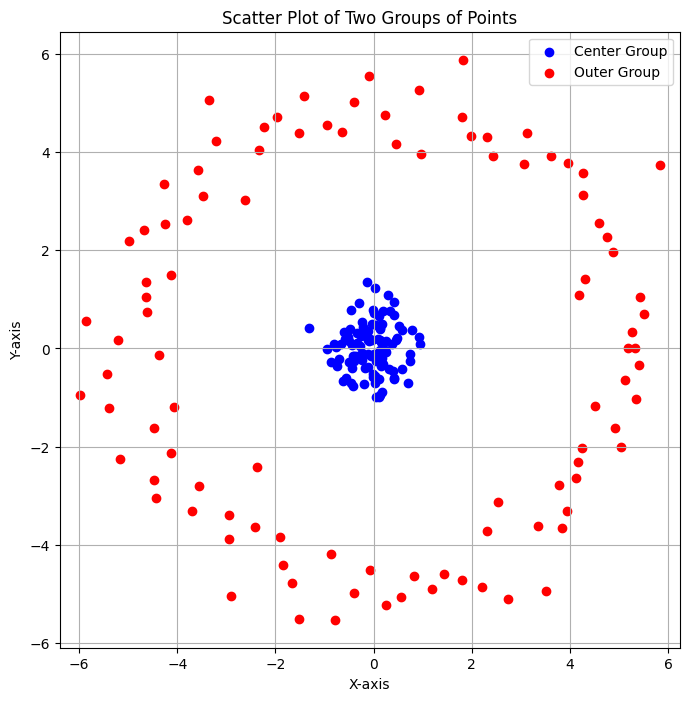

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate blue points centered around the origin
center_group_size = 100
center_group = np.random.randn(center_group_size, 2) * 0.5

# Generate red points around a circle
outer_group_size = 100
angle = np.linspace(0, 2 * np.pi, outer_group_size)
radius = 5 + np.random.randn(outer_group_size) * 0.5
outer_group = np.column_stack((radius * np.cos(angle), radius * np.sin(angle)))

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(center_group[:, 0], center_group[:, 1], color='blue', label='Center Group')
plt.scatter(outer_group[:, 0], outer_group[:, 1], color='red', label='Outer Group')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Two Groups of Points')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes

# Show the plot
plt.show()

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# Generate blue points centered around the origin
center_group_size = 100
center_group = np.random.randn(center_group_size, 2) * 0.5

# Generate red points around a circle
outer_group_size = 100
angle = np.linspace(0, 2 * np.pi, outer_group_size)
radius = 5 + np.random.randn(outer_group_size) * 0.5
outer_group = np.column_stack((radius * np.cos(angle), radius * np.sin(angle)))

# Combine the datasets and create labels
X = np.vstack((center_group, outer_group))
y = np.hstack((np.zeros(center_group_size), np.ones(outer_group_size)))

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the SVM model with RBF kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_scaled, y)

# Define a function to calculate the RBF kernel
def rbf_kernel(X1, X2, gamma=0.1):
    return np.exp(-gamma * np.sum((X1 - X2)**2))

# Create a grid of points in the original 2D space
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Map the grid to the 3D space using the RBF kernel
Z = np.array([rbf_kernel(scaler.transform(np.array([[x, y]])), svm_model.support_vectors_).sum() for x, y in grid])
Z = Z.reshape(xx.shape)

# Create the 3D plot with Plotly
fig = go.Figure()

# Plot the center group points in blue with markers
fig.add_trace(go.Scatter3d(
    x=center_group[:, 0],
    y=center_group[:, 1],
    z=np.zeros_like(center_group[:, 0]),
    mode='markers',
    marker=dict(color='blue', size=5, symbol='circle'),
    name='Center Group'
))

# Plot the outer group points in red with markers
fig.add_trace(go.Scatter3d(
    x=outer_group[:, 0],
    y=outer_group[:, 1],
    z=np.zeros_like(outer_group[:, 0]),
    mode='markers',
    marker=dict(color='red', size=5, symbol='circle'),
    name='Outer Group'
))

# Plot the decision boundary (hyperplane) in green
fig.add_trace(go.Surface(
    x=xx,
    y=yy,
    z=Z,
    colorscale='Greens',
    opacity=0.5,
    showscale=False,  # Hide color scale for decision boundary
    name='Decision Boundary'
))

# Set plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Kernel Mapped Z-axis'
    ),
    title='3D SVM Decision Boundary with RBF Kernel',
    legend=dict(
        title="Group",
        x=0.85, y=0.95
    ),
    width=800,
    height=800
)

# Show the plot
fig.show()


# mapping "3D SVM Decision Boundary with RBF Kernel" to 2D

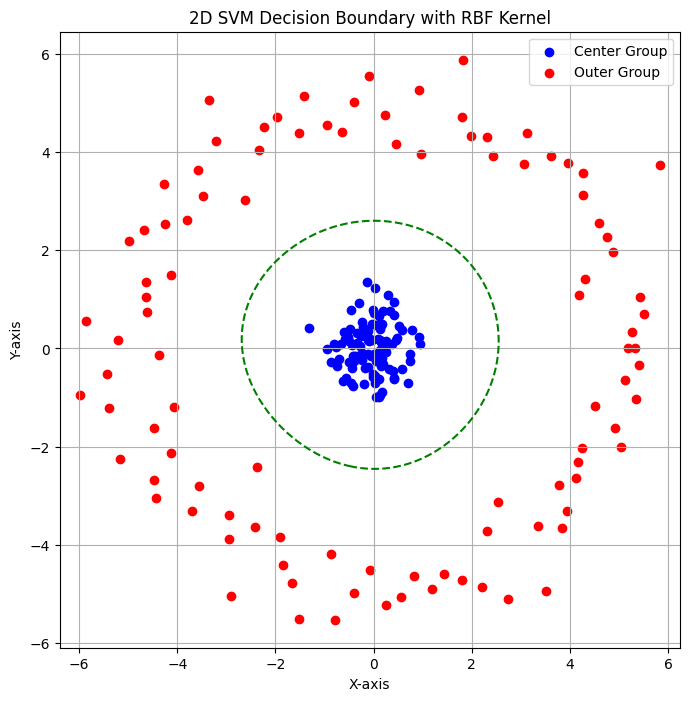

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate blue points centered around the origin
center_group_size = 100
center_group = np.random.randn(center_group_size, 2) * 0.5

# Generate red points around a circle
outer_group_size = 100
angle = np.linspace(0, 2 * np.pi, outer_group_size)
radius = 5 + np.random.randn(outer_group_size) * 0.5
outer_group = np.column_stack((radius * np.cos(angle), radius * np.sin(angle)))

# Combine the datasets and create labels
X = np.vstack((center_group, outer_group))
y = np.hstack((np.zeros(center_group_size), np.ones(outer_group_size)))

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_scaled, y)

# Create a grid of points in the original 2D space
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Standardize the grid points
grid_scaled = scaler.transform(grid)

# Compute the decision function for the grid points
decision_function = svm_model.decision_function(grid_scaled)
decision_function = decision_function.reshape(xx.shape)

# Plot the points and the decision boundary
plt.figure(figsize=(8, 8))

# Plot the center group points in blue
plt.scatter(center_group[:, 0], center_group[:, 1], color='blue', label='Center Group')

# Plot the outer group points in red
plt.scatter(outer_group[:, 0], outer_group[:, 1], color='red', label='Outer Group')

# Plot the decision boundary
plt.contour(xx, yy, decision_function, levels=[0], colors='green', linestyles='--')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D SVM Decision Boundary with RBF Kernel')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes

# Show the plot
plt.show()